In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import random

#Set random seeds for reproducibility
torch.manual_seed(0)
np.random.seed(0)

# Question 1 

Text(0.5, 1.0, 'R e L U(x)')

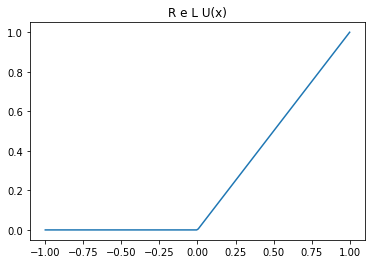

In [28]:
def ReLU(x):
  return torch.maximum(torch.tensor(0), x)

n_points = 200
x_lim = torch.linspace(-1, 1, n_points).reshape(-1,1)
y_pred = [ReLU(x) for x in x_lim]

plt.plot(x_lim.detach().numpy(), y_pred)
plt.title("R e L U(x)")

# Question 2


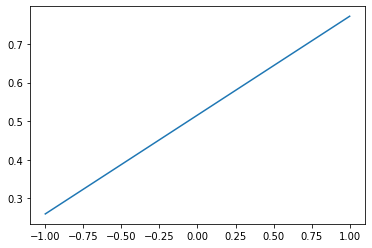

In [29]:
#ReLU activation
class Net_ReLU(nn.Module):
    def __init__(self, width):
        super(Net_ReLU, self).__init__()
        input_size = 1
        output_size = 1
        self.input = nn.Linear(input_size, width, bias=True)  
        self.hidden = nn.Linear(width, width, bias=True)
        self.output = nn.Linear(width, output_size, bias=True) 

        #Define relu activation
        self.act = ReLU 

    def forward(self, x):
        x = self.act(self.input(x)) 
        x = self.act(self.hidden(x)) 
        x = self.output(x) 
        return x

#Logic for initializing weights and biases
# https://stackoverflow.com/questions/49433936/how-to-initialize-weights-in-pytorch

N = 16 
net = Net_ReLU(N)
for _, param in net.named_parameters():
  param.data.fill_(0.1)

net.eval()
x_lim = torch.linspace(-1, 1, n_points).reshape(-1,1)
y_pred = net(x_lim)
plt.plot(x_lim.detach().numpy(), y_pred.detach().numpy())

        

# Question 3

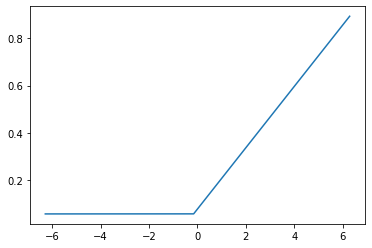

In [32]:
N = 16 
net = Net_ReLU(N)
for _, param in net.named_parameters():
  param.data.fill_(np.random.normal(0., 0.1))
  
net.eval()
x_lim = torch.linspace(-2*np.pi, 2*np.pi, n_points).reshape(-1,1)
y_pred = net(x_lim)
plt.plot(x_lim.detach().numpy(), y_pred.detach().numpy())

# Question 4


(array([  0.,   5.,   4.,   1.,   5.,   9.,  21.,  51., 128., 279., 294.,
        121.,  39.,  16.,   6.,   7.,   5.,   0.,   3.,   1.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ],
       dtype=float32),
 <a list of 20 Patch objects>)

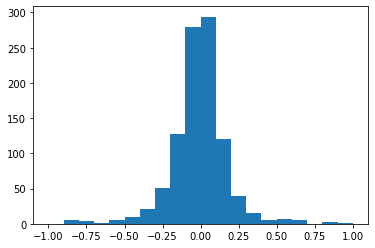

In [41]:
N = 16 
net = Net_ReLU(N)
x_1 = torch.linspace(1, 1, 1).reshape(-1,1)
x_lim = torch.linspace(-2*np.pi, 2*np.pi, n_points).reshape(-1,1)
num_runs = 1000
histogram = []
# Attempted to mask values of when x_lim == 1, however, no values from x_lim == 1 
mask = x_lim.eq(torch.tensor(1.))
x_masked = torch.masked_select(x_lim, mask).reshape(-1,1)
for i in range(num_runs):
  for _, param in net.named_parameters():
    param.data.fill_(np.random.normal(0., 0.1))
    
  net.eval()
  y_pred = net(x_1)
  histogram.append(y_pred.detach().numpy().squeeze())

plt.hist(np.array(histogram), bins=20, range=(-1,1))


# Question 5


(array([ 11.,   7.,  11.,  22.,  85., 213., 219.,  96.,  34.,  25.,  14.,
          7.]),
 array([-3. , -2.5, -2. , -1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ,
         2.5,  3. ], dtype=float32),
 <a list of 12 Patch objects>)

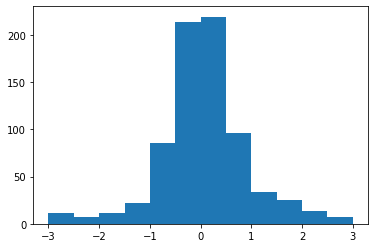

In [40]:
N = 16 
net = Net_ReLU(N)
x_1 = torch.linspace(1, 1, 1).reshape(-1,1)
num_runs = 1000
histogram = []
for i in range(num_runs):
  for _, param in net.named_parameters():
    param.data.fill_(np.random.normal(0., 0.5))
    
  net.eval()
  y_pred = net(x_1)
  histogram.append(y_pred.detach().numpy().squeeze())
  
plt.hist(np.array(histogram), bins=12, range=(-3,3))

The difference is that 99% of the data falls between - 1.5 to 1.5 instead of - 0.3 to 0.3 like question 4 due to the different variance used in question 5